In [1]:
import scipy.stats as stats
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('OnlineArrestData1980-2018.csv')

#### The function below lets you input a county from the list of counties from the dataframe and retrieves the different arrest types as well as the grand total of arrests for each county. The function will tell you male and female arrests for each type as well. The function is specific to 2018 arrests.

In [3]:
def county_crime_totals(df, county):
    df = df.loc[df['COUNTY'] == county]
    df = df.loc[df['YEAR'] == 2018]

    """the following is for the sum of crimes between the two genders"""
    violent_crimes = df.VIOLENT.sum()
    property_crimes = df.PROPERTY.sum()
    felony_drug_offenses = df.F_DRUGOFF.sum()
    f_sex = df.F_SEXOFF.sum()
    f_other = df.F_ALLOTHER.sum()
    misdemeanor = df.M_TOTAL.sum()
    status = df.S_TOTAL.sum()
    total_arrests = violent_crimes+property_crimes + \
        felony_drug_offenses+f_sex+f_other+misdemeanor+status

    """crimes for males only"""
    crime_total_males = df[df.GENDER != 'Female']
    male_violent_crimes = crime_total_males.VIOLENT.sum()
    male_property_crimes = crime_total_males.PROPERTY.sum()
    male_felony_drug_offenses = crime_total_males.F_DRUGOFF.sum()
    male_f_sex = crime_total_males.F_SEXOFF.sum()
    male_f_other = crime_total_males.F_ALLOTHER.sum()
    male_misdemeanor = crime_total_males.M_TOTAL.sum()
    male_status = crime_total_males.S_TOTAL.sum()
    male_total_arrests = male_violent_crimes+male_property_crimes + \
        male_felony_drug_offenses+male_f_sex+male_f_other+male_misdemeanor+male_status

    """crimes for females only"""
    crime_total_females = df[df.GENDER != 'Male']
    female_violent_crimes = crime_total_females.VIOLENT.sum()
    female_property_crimes = crime_total_females.PROPERTY.sum()
    female_felony_drug_offenses = crime_total_females.F_DRUGOFF.sum()
    female_f_sex = crime_total_females.F_SEXOFF.sum()
    female_f_other = crime_total_females.F_ALLOTHER.sum()
    female_misdemeanor = crime_total_females.M_TOTAL.sum()
    female_status = crime_total_females.S_TOTAL.sum()
    female_total_arrests = female_violent_crimes+female_property_crimes + \
        female_felony_drug_offenses+female_f_sex + \
        female_f_other+female_misdemeanor+female_status

    totals = (f'The total arrests in 2018 for violent_crimes in {county} county is: {violent_crimes}\n'
              f'The total arrests in 2018 for property crimes in {county} is {property_crimes}\n'
              f'The total arrests in 2018 for felony drug offenses in {county} is: {felony_drug_offenses}\n'
              f'The total arrests in 2018 for felony sex offenses in {county} is: {f_sex}\n'
              f'The total arrests in 2018 for other felony offenses in {county} is: {f_other}\n'
              f'The total arrests in 2018 for misdemeanors in {county} is: {misdemeanor}\n'
              f'The total arrests in 2018 for status violations in {county} is: {status}\n'
              f'The total number of arrests in {county} in 2018 was {total_arrests}')

    males = (f'The male arrests in 2018 for violent crimes in {county} county is: {male_violent_crimes}\n'
             f'The male arrests in 2018 for property crimes in {county} is {male_property_crimes}\n'
             f'The male arrests in 2018 for felony drug offenses in {county} is: {male_felony_drug_offenses}\n'
             f'The male arrests in 2018 for felony sex offenses in {county} is: {male_f_sex}\n'
             f'The male arrests in 2018 for other felony offenses in {county} is: {male_f_other}\n'
             f'The male arrests in 2018 for misdemeanors in {county} is: {male_misdemeanor}\n'
             f'The male arrests in 2018 for status violations in {county} is: {male_status}\n'
             f'The total number of male arrests in {county} in 2018 was {male_total_arrests}')

    females = (f'The female arrests in 2018 for violent crimes in {county} county is: {female_violent_crimes}\n'
               f'The female arrests in 2018 for property crimes in {county} is {female_property_crimes}\n'
               f'The female arrests in 2018 for felony drug offenses in {county} is: {female_felony_drug_offenses}\n'
               f'The female arrests in 2018 for felony sex offenses in {county} is: {female_f_sex}\n'
               f'The female arrests in 2018 for other felony offenses in {county} is: {female_f_other}\n'
               f'The female arrests in 2018 for misdemeanors in {county} is: {female_misdemeanor}\n'
               f'The female arrests in 2018 for status violations in {county} is: {female_status}\n'
               f'The total number of female arrests in {county} in 2018 was {female_total_arrests}')

    print(totals)
    print('\n')
    print(males)
    print('\n')
    print(females)

In [4]:
county_crime_totals(df, 'Los Angeles County')

The total arrests in 2018 for violent_crimes in Los Angeles County county is: 28865
The total arrests in 2018 for property crimes in Los Angeles County is 18901
The total arrests in 2018 for felony drug offenses in Los Angeles County is: 6412
The total arrests in 2018 for felony sex offenses in Los Angeles County is: 1029
The total arrests in 2018 for other felony offenses in Los Angeles County is: 18256
The total arrests in 2018 for misdemeanors in Los Angeles County is: 172389
The total arrests in 2018 for status violations in Los Angeles County is: 347
The total number of arrests in Los Angeles County in 2018 was 246199


The male arrests in 2018 for violent crimes in Los Angeles County county is: 22619
The male arrests in 2018 for property crimes in Los Angeles County is 14261
The male arrests in 2018 for felony drug offenses in Los Angeles County is: 5309
The male arrests in 2018 for felony sex offenses in Los Angeles County is: 1003
The male arrests in 2018 for other felony offen

#### This is for ranking each the amount of property crime each gender was arrested for and what county they are in for the year 2018.

In [5]:
gender_crime = df.drop(columns=['VIOLENT', 'RACE', 'F_DRUGOFF',
                                'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
gender_crime = gender_crime[gender_crime.YEAR == 2018]
gender_crime = gender_crime.groupby(
    ['COUNTY', 'GENDER', 'YEAR']).sum().reset_index()
gender_crime = gender_crime.sort_values('PROPERTY', ascending=False)
gender_crime.head()

,COUNTY,GENDER,YEAR,PROPERTY
37,Los Angeles County,Male,2018,14261
71,San Bernardino County,Male,2018,5334
36,Los Angeles County,Female,2018,4640
59,Orange County,Male,2018,3635
73,San Diego County,Male,2018,3163


#### This is for ranking each county for total amount of property crime for the year 2018.

In [6]:
county_crime = df.drop(columns=['VIOLENT', 'RACE', 'F_DRUGOFF',
                                'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
county_crime = county_crime[county_crime.YEAR == 2018]
county_crime = county_crime.groupby(['COUNTY', 'YEAR']).sum().reset_index()
county_crime = county_crime.sort_values('PROPERTY', ascending=False)
county_crime.head()

,COUNTY,YEAR,PROPERTY
18,Los Angeles County,2018,18901
35,San Bernardino County,2018,7310
29,Orange County,2018,4877
36,San Diego County,2018,4140
32,Riverside County,2018,3565


##### To get the percent or property arrests for each county, we need tht population for each county. I retrieved my information from california-demographics.com. From there I retrieved the populations from each county. I do not need rank, so I'll drop it. Then merge previous tables so arrests are on one table.

In [7]:
"""webscrape populations from website"""
page = requests.get(
    'https://www.california-demographics.com/counties_by_population')
soup = BeautifulSoup(page.content, 'html.parser')
container = pd.read_html(page.content)
container = pd.DataFrame(container[0])
container.drop(columns=['Rank'], inplace=True)

"""now to combine tables"""
combined_table = container.join(county_crime.set_index('COUNTY'), on='County')
combined_table = combined_table.drop(58, axis=0)
combined_table = combined_table.astype({'Population': int, 'PROPERTY': int})
percentage = (combined_table['PROPERTY']/combined_table['Population'])
combined_table['percentage'] = percentage
combined_table = combined_table.groupby(['County']).sum().reset_index()
combined_table = combined_table.sort_values('percentage', ascending=False)
combined_table.rename(columns={'YEAR': 'year', 'PROPERTY': 'property', 'County': 'County', 'Population': 'population'},
                      inplace=True)

"""Ascending = False will put it in order from greatest to least by percentage"""
combined_table.head()

,County,population,year,property,percentage
45,Sierra County,2987,2018.0,15,0.005022
35,San Bernardino County,2171603,2018.0,7310,0.003366
53,Tulare County,465861,2018.0,1495,0.003209
14,Kern County,896764,2018.0,2607,0.002907
50,Sutter County,96807,2018.0,254,0.002624


##### The top 5 and bottom 5 counties for male arrests

In [8]:
# Filter the dataframe for only male crimes in 2018 and drop unneccessary columns
male_crimes = df[df['GENDER'] != 'Female']
male_crimes = male_crimes[male_crimes['YEAR'] == 2018]
male_crimes = male_crimes.drop(columns=[
                               'VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
male_crimes = male_crimes.groupby(
    ['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()

# Set a variable so I have the greatest percent for males
top_male_counties = container.join(
    male_crimes.set_index('COUNTY'), on='County')
top_male_counties = top_male_counties.drop(58, axis=0)

# Make sure property and population are integers so I can divide them
top_male_counties = top_male_counties.astype(
    {'PROPERTY': int, 'Population': int})
male_percent = (top_male_counties['PROPERTY']/top_male_counties['Population'])
top_male_counties['Male Percent'] = male_percent

# I want the table to be in descending order, so I set ascending=False
top_male_counties = top_male_counties.sort_values(
    'Male Percent', ascending=False)

# The top 5 is the first 5 entires of this table, so i can set top_5 equal to the first 5
top_5_male_counties = top_male_counties[:5]
top_5_male_counties

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
56,Sierra County,2987,Male,2018.0,11,0.003683
4,San Bernardino County,2171603,Male,2018.0,5334,0.002456
17,Tulare County,465861,Male,2018.0,1092,0.002344
10,Kern County,896764,Male,2018.0,2064,0.002302
54,Trinity County,12535,Male,2018.0,24,0.001915


In [9]:
male_avg = top_male_counties['Male Percent'].mean()
print(f'The average crime rate per county amongst males is: {male_avg}')

The average crime rate per county amongst males is: 0.0013619698296238136


In [10]:
# using similar code to the cell above, we can find the bottom 5 with the last 5 entries of top_male_counties

bot_5_male_counties = top_male_counties[-5:]
bot_5_male_counties

,County,Population,GENDER,YEAR,PROPERTY,Male Percent
22,San Luis Obispo County,284010,Male,2018.0,245,0.000863
45,Amador County,39383,Male,2018.0,30,0.000762
43,Calaveras County,45602,Male,2018.0,27,0.000592
41,San Benito County,61537,Male,2018.0,35,0.000569
53,Mono County,14250,Male,2018.0,7,0.000491


##### The top 5 and bottom 5 counties for female arrests 

In [11]:
# Similar to finding only male crimes, we'll find only female crimes in 2018

female_crimes = df[df['GENDER'] != 'Male']
female_crimes = female_crimes[female_crimes['YEAR'] == 2018]
female_crimes = female_crimes.drop(columns=[
                                   'VIOLENT', 'RACE', 'F_DRUGOFF', 'F_SEXOFF', 'F_ALLOTHER', 'F_TOTAL', 'M_TOTAL', 'S_TOTAL'])
female_crimes = female_crimes.groupby(
    ['GENDER', 'COUNTY', 'YEAR']).sum().reset_index()

top_female_counties = container.join(
    female_crimes.set_index('COUNTY'), on='County')
top_female_counties = top_female_counties.drop(58, axis=0)

top_female_counties = top_female_counties.astype(
    {'PROPERTY': int, 'Population': int})
female_percent = (
    top_female_counties['PROPERTY']/top_female_counties['Population'])
top_female_counties['Female Percent'] = female_percent

top_female_counties = top_female_counties.sort_values(
    'Female Percent', ascending=False)
female_avg = top_female_counties['Female Percent'].mean()

top_5_female_counties = top_female_counties[:5]
top_female_counties.head()

,County,Population,GENDER,YEAR,PROPERTY,Female Percent
56,Sierra County,2987,Female,2018.0,4,0.001339
4,San Bernardino County,2171603,Female,2018.0,1976,0.000910
57,Alpine County,1101,Female,2018.0,1,0.000908
39,Lake County,64382,Female,2018.0,56,0.000870
17,Tulare County,465861,Female,2018.0,403,0.000865


In [12]:
female_avg = top_female_counties['Female Percent'].mean()
print(f'The average crime rate per county amongst females is: {female_avg}')

The average crime rate per county amongst females is: 0.0005205123957174825


In [13]:
bot_5_female_counties = top_female_counties[-5:]
bot_5_female_counties

,County,Population,GENDER,YEAR,PROPERTY,Female Percent
13,San Mateo County,769545,Female,2018.0,203,0.000264
41,San Benito County,61537,Female,2018.0,16,0.000260
45,Amador County,39383,Female,2018.0,10,0.000254
55,Modoc County,8777,Female,2018.0,2,0.000228
53,Mono County,14250,Female,2018.0,2,0.000140


##### Use a Welch's T test for male and female percents for any statistical signicance in the means

In [14]:
males = top_male_counties['Male Percent']
females = top_female_counties['Female Percent']
welchs = stats.ttest_ind_from_stats(mean1=males.mean(), nobs1=len(males), std1=males.std(),
                                    mean2=females.mean(), nobs2=len(females), std2=females.std(),
                                    equal_var=False)
welchs

Ttest_indResult(statistic=11.491664385097167, pvalue=3.341432470934707e-18)

##### Graphing a histogram of male and female arrest percentages

Text(0, 0.5, 'Number of Counties')

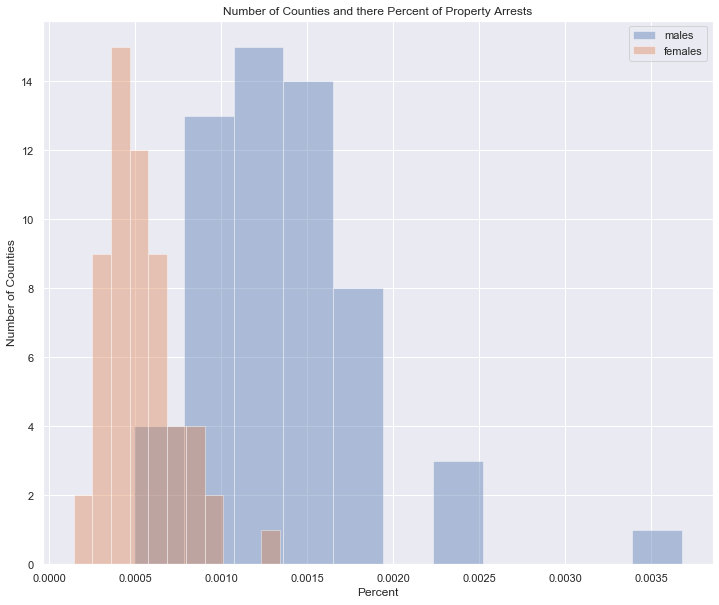

In [15]:
sns.set(color_codes=True)
sns.set(rc={'figure.figsize': (12, 10)})
sns.distplot(males, label='males', kde=False)
sns.distplot(females, label='females', kde=False)
plt.legend()
plt.title('Number of Counties and there Percent of Property Arrests')
plt.xlabel('Percent')
plt.ylabel('Number of Counties')

### Combing my data with partners data

In [16]:
# His data was in two different csv files, so I concatenated the two for one big datafraeme

df2 = pd.read_csv('lower-half-restaurants-ratio.csv')
df3 = pd.read_csv('restaurant-ratios.csv')
all_ratios = pd.concat([df2, df3])
all_ratios.drop(columns=['Unnamed: 0'], inplace=True)
all_ratios.head()

,County,ratio
0,Butte,57814.000000
1,Contra Costa,42600.555556
2,Fresno,39776.000000
3,Imperial,90913.500000
4,Kern,49820.222222


In [17]:
#  I wanted to rename my columns from all caps to a proper title. I also ran into the problem of etra white space in
#  my County elements and my county names not exactly matching my partner's county names. I had the extra word,
#  'County', so I had to remove that word.

combined_table.rename(
    columns={'YEAR': 'Year', 'PROPERTY': 'Property'}, inplace=True)
combined_table.County = combined_table['County'].map(
    lambda x: x.replace('County', ''))
combined_table.County = combined_table.County.apply(lambda x: x.strip())
combined_table.set_index('County').join(all_ratios.set_index('County'))
combined_table.head()

,County,population,year,property,percentage
45,Sierra,2987,2018.0,15,0.005022
35,San Bernardino,2171603,2018.0,7310,0.003366
53,Tulare,465861,2018.0,1495,0.003209
14,Kern,896764,2018.0,2607,0.002907
50,Sutter,96807,2018.0,254,0.002624


In [18]:
# The final table is my data and my partner's combined and organized in descending order by ratio
# The ratio is representative of people:restaurants

final_table = pd.merge(combined_table, all_ratios,
                       how='left', left_on='County', right_on='County')
final_table = final_table.dropna(axis=0)
final_table = final_table.sort_values(by='ratio', ascending=True)
final_table.head()

,County,population,year,property,percentage,ratio
28,Modoc,8777,2018.0,16,0.001823,8777.0
11,Del Norte,27828,2018.0,65,0.002336,13914.0
34,Glenn,28047,2018.0,47,0.001676,14023.5
39,Inyo,17987,2018.0,28,0.001557,17987.0
35,Colusa,21627,2018.0,36,0.001665,21627.0


## Running a Two sample T test on our combined data

In [19]:
# My partner was testing the realtionship between county populations and ratio of fast food restaurants, and found a
# half way mark, so I divided mine in half as well.

top_half = final_table[:22]
bot_half = final_table[23:]
top_half_mean = top_half['ratio'].mean()
bot_half_mean = bot_half['ratio'].mean()
top_half_stdev = top_half['ratio'].std()
bot_half_stdev = bot_half['ratio'].std()
t_score = stats.ttest_ind_from_stats(mean1=top_half_mean, mean2=bot_half_mean, std1=top_half_stdev,
                                     std2=bot_half_stdev, nobs1=len(top_half), nobs2=len(bot_half),
                                     equal_var=False)
t_score

Ttest_indResult(statistic=-4.333598205256982, pvalue=0.00025732544882016537)

### Graphing the differences in male and female property arrets percents

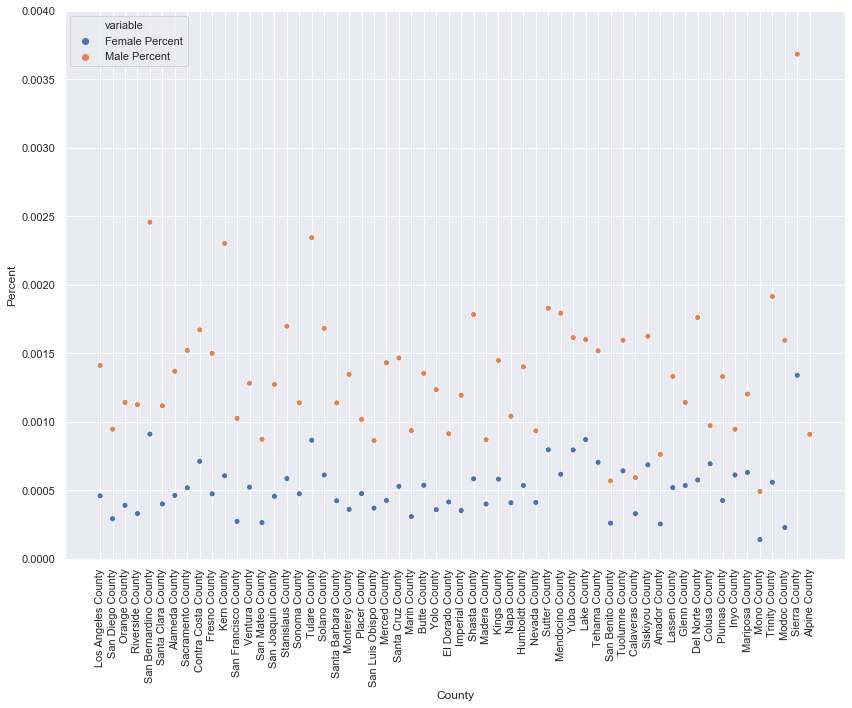

In [20]:
new_males = top_male_counties.drop(columns=['Population', 'YEAR'])
new_males.rename(columns={'GENDER': 'Gender'}, inplace=True)
male_female_table = pd.concat([new_males, top_female_counties], axis=1, )
male_female_table.rename(columns={'GENDER': 'Gender'}, inplace=True)
scatter_df = male_female_table.loc[:, ~male_female_table.columns.duplicated()]
scatter_df = scatter_df.melt(id_vars=['County'], value_vars=[
                         'Female Percent', 'Male Percent'])
ax = sns.scatterplot(data=scatter_df, x='County', y='value', hue='variable')
plt.ylim((0, 0.0040))
plt.ylabel('Percent')
ax.set_xticklabels(rotation=90, labels=scatter_df.County.tolist())
plt.tight_layout()

## Testing the link between ff and property arrests

In [21]:
# I know there are 58 rows in my combined_Table dataframe, so that's why 29 is used in the top and bottom half

top_percent = combined_table[:29]
bot_percent = combined_table[29:]

In [22]:
mean1 = top_percent['percentage'].mean()
std1 = np.std(top_percent['percentage'])
len1 = len(top_percent)
mean2 = np.mean(top_half['ratio'])
nobs2 = len(top_half['ratio'])
std2 = np.std(top_half['ratio'])
top_ff_crime = stats.ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=len1,
                                          mean2=mean2, nobs2=nobs2, std2=std2,
                                          equal_var=False)
top_ff_crime

Ttest_indResult(statistic=-15.78698661496598, pvalue=3.9973190806132137e-13)

In [23]:
mean1 = bot_percent['percentage'].mean()
std1 = np.std(bot_percent['percentage'])
nobs1 = len(bot_percent['percentage'])
mean2 = np.mean(bot_half['ratio'])
std2 = np.std(bot_half['ratio'])
nobs2 = len(bot_half['ratio'])
bot_ff_crime = stats.ttest_ind_from_stats(mean1=mean1, std1=std1, nobs1=nobs1,
                                          mean2=mean2, std2=std2, nobs2=nobs2,
                                          equal_var=False)
bot_ff_crime

Ttest_indResult(statistic=-7.422123266990087, pvalue=2.6812323485950786e-07)

## Histogram of Property Crime Percents, Binned by County

Text(0.5, 1.0, 'Percent of Property Crimes and Counties')

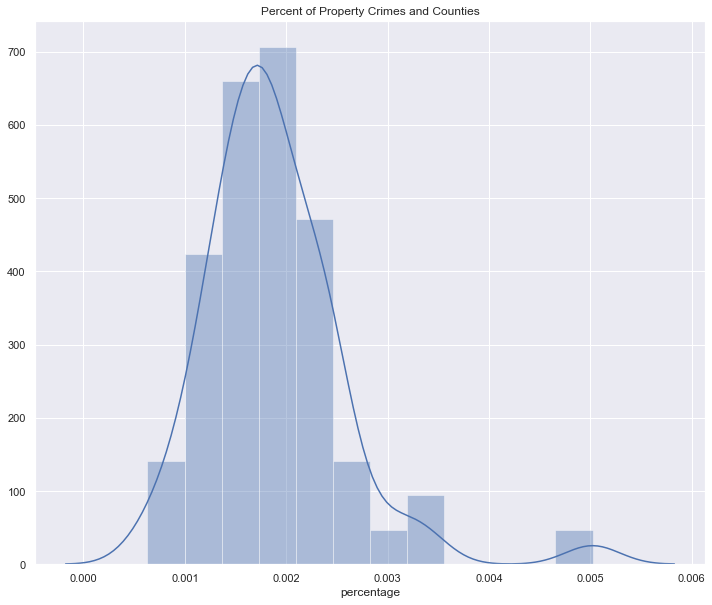

In [24]:
sns.distplot(combined_table['percentage'])
plt.title('Percent of Property Crimes and Counties')

## Histogram of Population:Restaurant Ratio

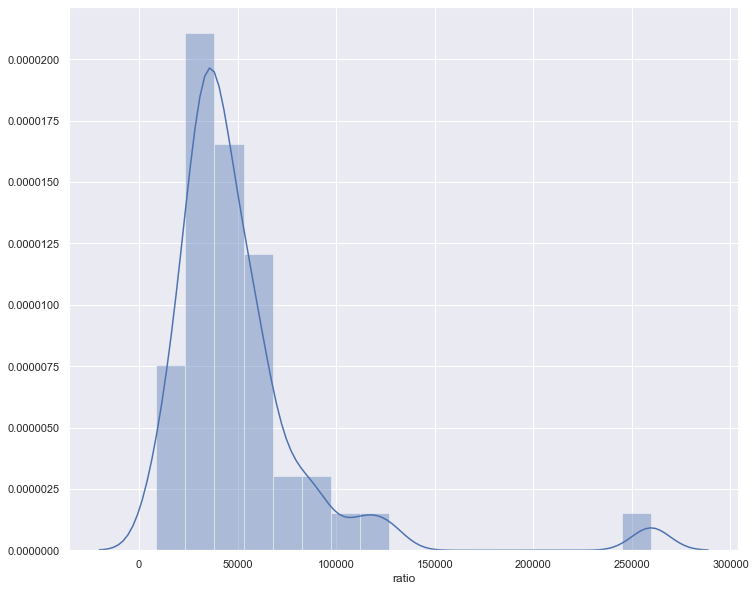

In [25]:
ax = sns.distplot(all_ratios['ratio'])

## Confidence Interval Test for Means of Property Arrests

In [26]:
from scipy.integrate import simps
from scipy.stats import t

import math
# confidence interval of percent of property arrests
mean = combined_table['percentage'].mean()
# evaluate sample variance by setting delta degrees of freedom (ddof) to
# 1. The degree used in calculations is N - ddof
stddev = combined_table['percentage'].std()
# Get the endpoints of the range that contains 95% of the distribution
t_bounds = t.interval(0.95, 7)
# sum mean to the confidence interval
ci = [mean + critical * stddev /
      np.sqrt(len(combined_table['percentage'])) for critical in t_bounds]
print('Mean: %f' % mean)
print('Confidence Interval 95%%: %f, %f' % (ci[0], ci[1]))

Mean: 0.001882
Confidence Interval 95%: 0.001668, 0.002097


I can say with 95% confidence, the range of mean values is between 0.001688 and 0.002097. This reflects the percent of property arrests in each county of CA. 